In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display

t = np.linspace(0,100)
x = 5*t**2 + 0.5

data = {
    "t": t,
    "x": x
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("beschleunigt.csv", index=False)

<IPython.core.display.Latex object>

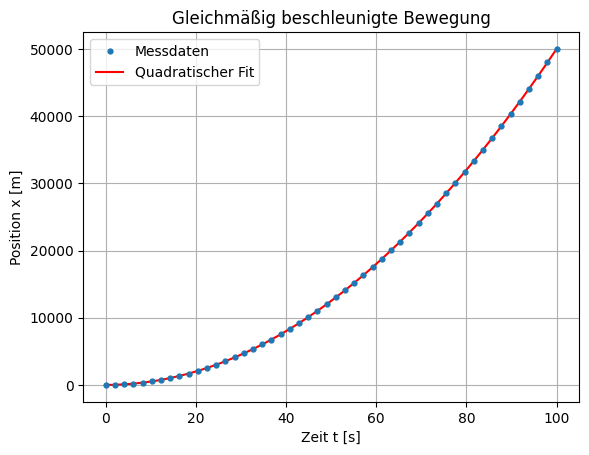

<IPython.core.display.Latex object>

In [31]:
df = pd.read_csv("beschleunigt.csv")
t = df["t"].to_numpy()
x = df["x"].to_numpy()


coeffs = np.polyfit(t, x, 2)
a = 2 * coeffs[0]
v0 = coeffs[1]
x0 = coeffs[2]

display(Latex((rf"$$a = {a:.2f} m/s² \\ v_0 = {v0:.2f} m/s \\ x_0 = {x0:.2f} m$$")))

x_fit = np.polyval(coeffs, t)

plt.figure()
plt.plot(t, x, 'o', markersize=3.5, label="Messdaten", zorder =10)
plt.plot(t, x_fit, color="red", label=f"Quadratischer Fit")
plt.xlabel("Zeit t [s]")
plt.ylabel("Position x [m]")
plt.title("Gleichmäßig beschleunigte Bewegung")
plt.legend()
plt.grid(True)
plt.show()

m1 = 0.25  # kg, Gleiter
m2 = 0.02  # kg, Gewicht
F_2 = m2 * 9.81
F_1 = (m1 + m2) * a
F_reib = F_2 - F_1
mu_g = F_reib / (m1 * 9.81)
display(Latex(f"$$µ_G ≈ {mu_g:.4f}$$"))

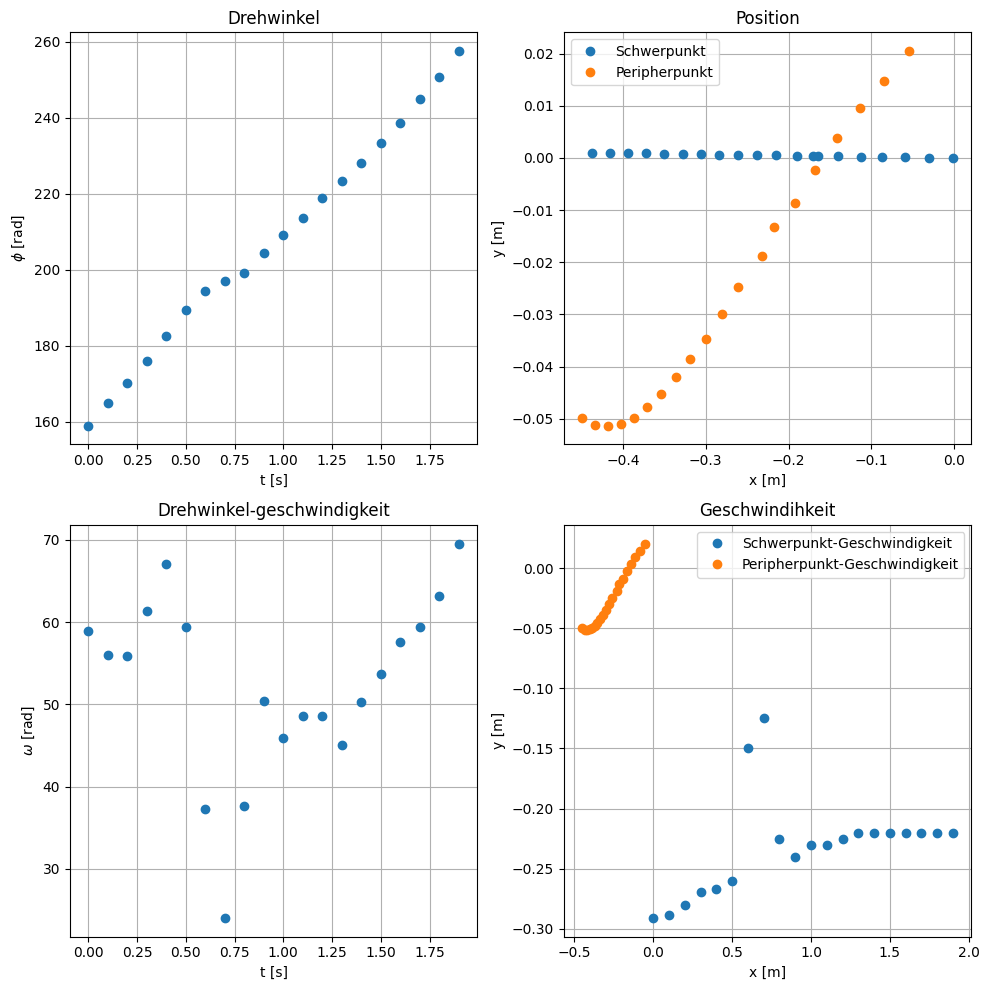

In [75]:
df = pd.read_csv("Kraftfrei.csv")

t = df["t"].to_numpy()
x_center = df["x_center"].to_numpy()
x_v = df["x_v"].to_numpy()
y_v = df["y_v"].to_numpy()

x = x_v - x_center
y = y_v

# Position of boundary point

phi = np.unwrap(np.arctan2(y,x)) * 180/np.pi
omega = np.polyfit(phi,t,1)

omega = np.gradient(phi,t)

df = pd.DataFrame({"t [s]": t, "winkel [°]": phi})
#print(df)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].plot(t, phi, 'o')
axes[0,0].set_xlabel("t [s]")
axes[0,0].set_ylabel(r"$\phi$ [rad]")
axes[0,0].set_title("Drehwinkel")
axes[0,0].grid(True)

axes[0,1].plot(x_center, np.linspace(0, 0.001, 20), 'o', label="Schwerpunkt")
axes[0,1].plot(x_v, y_v, 'o', label="Peripherpunkt")
axes[0,1].set_xlabel("x [m]")
axes[0,1].set_ylabel("y [m]")
axes[0,1].set_title("Position")
axes[0,1].legend()
axes[0,1].grid(True)

axes[1,0].plot(t, omega, 'o')
axes[1,0].set_xlabel("t [s]")
axes[1,0].set_ylabel(r"$\omega$ [rad]")
axes[1,0].set_title("Drehwinkel-geschwindigkeit")
axes[1,0].grid(True)

axes[1,1].plot(t, np.gradient(x_center,t), 'o', label="Schwerpunkt-Geschwindigkeit")
axes[1,1].plot(x_v, y_v, 'o', label="Peripherpunkt-Geschwindigkeit")
axes[1,1].set_xlabel("x [m]")
axes[1,1].set_ylabel("y [m]")
axes[1,1].set_title("Geschwindihkeit")
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()
